##### CIFAR = 'cifar-10-batches-py/'
import numpy as np

In [6]:
def unpickle(file):
    import pickle
    with open(file,'rb') as fo:
        cifar_dict = pickle.load(fo,encoding='bytes')
    return cifar_dict

In [7]:
dirs = ['batches.meta','data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5','test_batch']

all_data = [0,1,2,3,4,5,6]

for i, direc in zip(all_data,dirs):
    all_data[i] = unpickle(CIFAR+direc)

In [8]:
batch_meta = all_data[0]
data_batch1 = all_data[1]
data_batch2 = all_data[2]
data_batch3 = all_data[3]
data_batch4 = all_data[4]
data_batch5 = all_data[5]
test_batch = all_data[6]

In [9]:
all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
test_batch1 = [test_batch]

training_image = np.vstack([d[b"data"] for d in all_train_batches])
train_len = len(training_image)
training_image = training_image.reshape(train_len,3*32*32)
training_label = np.hstack([d[b"labels"] for d in all_train_batches])

In [ ]:
training_label

array([6, 9, 9, ..., 9, 1, 1])

In [10]:
test_image = np.vstack([d[b"data"] for d in test_batch1])
test_len = len(test_image)
test_image = test_image.reshape(test_len,3*32*32)
test_label = np.hstack([d[b"labels"] for d in test_batch1])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(.90)
X_train = pca.fit_transform(training_image)
X_test = pca.transform(test_image)

In [ ]:
from sklearn.manifold import TSNE
data_X = X_train
y = training_label
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(data_X)
tsne_obj

array([[  0.8410238, -14.224294 ],
       [ -8.132631 ,  21.016752 ],
       [-27.649122 ,  29.220243 ],
       ...,
       [-26.424957 ,  22.860758 ],
       [ -1.6033524,  34.906788 ],
       [ -2.910002 ,  13.784034 ]], dtype=float32)

In [ ]:
import pickle
filename = 'TSNE_obj PCA.sav'
pickle.dump(tsne_obj, open(filename, 'wb'))

In [1]:
import pickle
filename = 'TSNE/TSNE_obj PCA.sav'
tsne_obj = pickle.load(open(filename, 'rb'))

In [12]:
y = training_label

In [13]:
import pandas as pd
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'Labels':y})
tsne_df.head()

,X,Y,Labels
0,0.841024,-14.224294,6
1,-8.132631,21.016752,9
2,-27.649122,29.220243,9
3,-10.005714,-32.509167,4
4,-25.676447,-0.537018,1


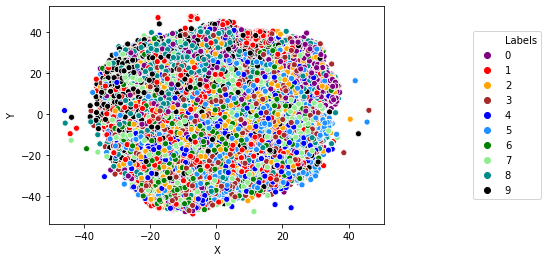

In [15]:
import seaborn as sns
scatter = sns.scatterplot(x="X", y="Y",
              hue="Labels",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','darkcyan', 'black'],
              legend='full',
              data=tsne_df);
scatter.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)